# Linear Regression (Univariate)

## Model:
#### f w,b (x) = wx + b
## Cost Function:
### J(w,b) = 1/2m sum from i=1 to m (f w,b(xi)-yi)^2
## Gradient Descent:
### w := w - a . 1/m sum from i=1 to m (f w,b(xi)-yi) . xi
### b := b - a . 1/m sum from i=1 to m (f w,b(xi)-yi)

## Steps
### Training:
1. Initialize weight as zero
2. Initial bias as zero
### Given a data point:
1. Predict result by using f w,b (x) = wx + b or simple y^ = wx + b
2. Calculate Error
3. Use gradient descent to figure out new weight and bias values
4. Repeat n times
### Testing:
Given a data point:
 > Put in the values from the date point in the equation y^ = wx + b

### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Model Implementation

In [9]:
import numpy as np
class LinearRegression():
    def __init__(self, lr = 0.001, epochs = 1000):
        self.lr = lr
        self.epochs = epochs
        self.weight = None
        self.bias = None
        
        
    def fit(self,X,y):
        m = X.shape[0]
        self.weight = 0
        self.bias = 0
        epoch = []
        cost = []

        for i in range(self.epochs):
            y_pred = np.dot(X.T,self.weight) + self.bias
            cost.append(np.mean((y_pred - y)**2))
            epoch.append(i+1)
            
            dw = (1/m) * np.dot(X, (y_pred - y))
            db = (1/m) * np.sum(y_pred - y)

            self.weight = self.weight - ( self.lr * dw)
            self.bias = self.bias - (self.lr * db)

        plt.plot(epoch,cost,color = 'r')
        print(cost[-1])
    def predict(self, X):
        y_pred = np.dot(X,self.weight) + self.bias
        return y_pred
        
        
 

### Importing Dataset

In [10]:
dataset = pd.read_csv('Salary_Data.csv')
X,y = dataset.iloc[:,0], dataset.iloc[:,1]

### Splitting the Data into the Training and Test Sets

In [11]:
X_train, X_test = X[0:20], X[20:30]
y_train,y_test = y[0:20], y[20:30]

### Fitting the Model to the Training Set

36883552.15284631


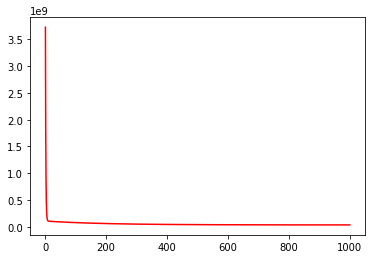

In [12]:
regressor = LinearRegression(0.02,1000)
regressor.fit(X_train, y_train)

### Predict the Test Set Results

In [13]:
y_pred = regressor.predict(X_test)

### Visualizing the Training Set results

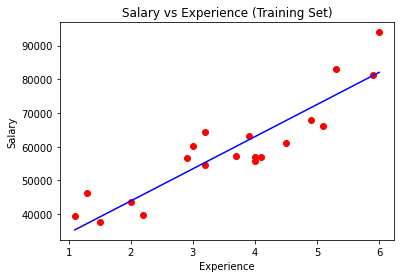

In [14]:
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'b')
plt.title('Salary vs Experience (Training Set)')
plt.xlabel('Experience')
plt.ylabel('Salary')
plt.show()

### Visualizing the Test Set results

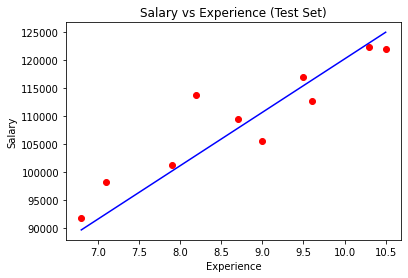

In [15]:
plt.scatter(X_test, y_test, color = 'r')
plt.plot(X_test,regressor.predict(X_test), color = 'b')
plt.title('Salary vs Experience (Test Set)')
plt.xlabel('Experience')
plt.ylabel('Salary')
plt.show()